In [85]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
df=pd.read_csv('/content/retail_sales_dataset.csv')

In [87]:
print(df)

     Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  24-11-2023     CUST001    Male   34           Beauty   
1                 2  27-02-2023     CUST002  Female   26         Clothing   
2                 3  13-01-2023     CUST003    Male   50      Electronics   
3                 4  21-05-2023     CUST004    Male   37         Clothing   
4                 5  06-05-2023     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  16-05-2023     CUST996    Male   62         Clothing   
996             997  17-11-2023     CUST997    Male   52           Beauty   
997             998  29-10-2023     CUST998  Female   23           Beauty   
998             999  05-12-2023     CUST999  Female   36      Electronics   
999            1000  12-04-2023    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Amount  discount  profit %  
0           3  

#Data Manipulation and cleaning

In [88]:
#checking null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Amount              0
discount            0
profit %            0
dtype: int64

In [89]:
#checking no.of rows and columns
df.shape

(1000, 11)

In [90]:
#checking duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [91]:
#counting no.of duplicates
df.duplicated().value_counts()

False    1000
dtype: int64

In [92]:
#checking data type of every column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Date              1000 non-null   object 
 2   Customer ID       1000 non-null   object 
 3   Gender            1000 non-null   object 
 4   Age               1000 non-null   int64  
 5   Product Category  1000 non-null   object 
 6   Quantity          1000 non-null   int64  
 7   Price per Unit    1000 non-null   int64  
 8   Amount            1000 non-null   int64  
 9   discount          1000 non-null   float64
 10  profit %          1000 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


In [93]:
#getting statistical measures
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Amount,discount,profit %
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000,0.101120,0.113130
std,288.819436,13.68143,1.132734,189.681356,559.997632,0.116648,0.090202
min,1.000000,18.00000,1.000000,25.000000,25.000000,0.000000,0.050000
25%,250.750000,29.00000,1.000000,30.000000,60.000000,0.000000,0.050000
50%,500.500000,42.00000,3.000000,50.000000,135.000000,0.050000,0.050000
75%,750.250000,53.00000,4.000000,300.000000,900.000000,0.180000,0.130000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000,0.400000,0.350000


In [94]:
#top 5 rows
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Amount,discount,profit %
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150,0.05,0.05
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000,0.25,0.12
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30,0.00,0.05
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500,0.12,0.20
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100,0.05,0.05


In [95]:
#creating new column Amount after Discount
df['Amount_after_discount']=round(df['Amount']-(df['Amount'] * df['discount']))

In [96]:
#creating new column Cost price
df['cost_price'] = round(df['Amount_after_discount'] - (df['Amount_after_discount'] * df['profit %']))

In [97]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Amount,discount,profit %,Amount_after_discount,cost_price
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150,0.05,0.05,142.0,135.0
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000,0.25,0.12,750.0,660.0
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30,0.00,0.05,30.0,28.0
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500,0.12,0.20,440.0,352.0
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100,0.05,0.05,95.0,90.0


In [98]:
#creating new column profit
df['profit'] = df['Amount_after_discount'] - df['cost_price']

In [99]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Amount,discount,profit %,Amount_after_discount,cost_price,profit
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150,0.05,0.05,142.0,135.0,7.0
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000,0.25,0.12,750.0,660.0,90.0
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30,0.00,0.05,30.0,28.0,2.0
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500,0.12,0.20,440.0,352.0,88.0
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100,0.05,0.05,95.0,90.0,5.0


#count of purchases

In [100]:
#count no.of purchases by gender
df['Gender'].value_counts()

Female    510
Male      490
Name: Gender, dtype: int64

In [101]:
#count no.of purchases by product category
df['Product Category'].value_counts()

Clothing       351
Electronics    342
Beauty         307
Name: Product Category, dtype: int64

In [102]:
#total no.of purchases
df.count()

Transaction ID           1000
Date                     1000
Customer ID              1000
Gender                   1000
Age                      1000
Product Category         1000
Quantity                 1000
Price per Unit           1000
Amount                   1000
discount                 1000
profit %                 1000
Amount_after_discount    1000
cost_price               1000
profit                   1000
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transaction ID         1000 non-null   int64  
 1   Date                   1000 non-null   object 
 2   Customer ID            1000 non-null   object 
 3   Gender                 1000 non-null   object 
 4   Age                    1000 non-null   int64  
 5   Product Category       1000 non-null   object 
 6   Quantity               1000 non-null   int64  
 7   Price per Unit         1000 non-null   int64  
 8   Amount                 1000 non-null   int64  
 9   discount               1000 non-null   float64
 10  profit %               1000 non-null   float64
 11  Amount_after_discount  1000 non-null   float64
 12  cost_price             1000 non-null   float64
 13  profit                 1000 non-null   float64
dtypes: float64(5), int64(5), object(4)
memory usage: 109.5+ K

In [104]:
#count of  purchases by year
#converting date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])
(df['Date'].dt.year).value_counts()

<ipython-input-104-82c46e42198d>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


2023    998
2024      2
Name: Date, dtype: int64

In [105]:
#count of  purchases by month
(df['Date'].dt.month).value_counts()

5     108
8      93
1      90
4      87
7      83
2      81
11     79
6      79
10     78
9      76
3      73
12     73
Name: Date, dtype: int64

In [106]:
#top 5 count of purchases by day
(df['Date'].dt.day).value_counts().head(5)

10    45
23    44
5     42
12    40
2     40
Name: Date, dtype: int64

In [107]:
#count no of purchases by month name
(df['Date'].dt.strftime('%b')).value_counts()

May    108
Aug     93
Jan     90
Apr     87
Jul     83
Feb     81
Nov     79
Jun     79
Oct     78
Sep     76
Mar     73
Dec     73
Name: Date, dtype: int64

In [108]:
#count no.of purchases by weekday
(df['Date'].dt.day_name()).value_counts()

Monday       172
Tuesday      160
Friday       159
Saturday     130
Sunday       128
Wednesday    126
Thursday     125
Name: Date, dtype: int64

In [109]:
#count of purchases during week ends and week days
weekday=(df['Date'].dt.day_name())
#weekdays
weekdays_count = df[weekday.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].shape[0]
print('week days count : ',weekdays_count)
#week ends
weekends_count=df[weekday.isin(['Sunday','Saturday'])].shape[0]
print('week ends count : ',weekends_count)

week days count :  742
week ends count :  258


In [110]:
#Average purchase during weekdays
weekdays_count = df[weekday.isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])].shape[0]
weekdays_num = ['Monday','Tuesday','Wednesday','Thursday','Friday']
avg_count_in_weekdays = weekdays_count // len(weekdays_num)
print(avg_count_in_weekdays)

148


In [111]:
#Average purchase during week ends
weekends_count=df[weekday.isin(['Sunday','Saturday'])].shape[0]
weekends_num =['Saturday','Sunday']
avg_count_in_weekends = weekends_count // len(weekends_num)
print(avg_count_in_weekends)

129


# Total Amount Analysis

In [112]:
#Amount by gender
df.groupby(df['Gender'])['Amount'].sum()

Gender
Female    232840
Male      223160
Name: Amount, dtype: int64

In [113]:
#Amount by product category
df.groupby(df['Product Category'])['Amount'].sum()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Amount, dtype: int64

In [114]:
#total Amount
df['Amount'].sum()

456000

In [115]:
#Amount by year
extract_year = df['Date'].dt.year
df.groupby(extract_year)['Amount'].sum()

Date
2023    454470
2024      1530
Name: Amount, dtype: int64

In [116]:
#top 5 Amount by date
date_extract = df['Date'].dt.day
df.groupby(date_extract)['Amount'].sum().sort_values(ascending=False).head(5)

Date
23    24700
24    21955
12    21580
10    20820
16    20520
Name: Amount, dtype: int64

In [117]:
#Amount by month name
monthname = df['Date'].dt.strftime('%b')
df.groupby(monthname)['Amount'].sum()

Date
Apr    29715
Aug    39155
Dec    28175
Feb    39430
Jan    48720
Jul    42505
Jun    42205
Mar    28750
May    58590
Nov    33020
Oct    37130
Sep    28605
Name: Amount, dtype: int64

In [118]:
#Amount by weekday
extract_weekday = df['Date'].dt.day_name()
df.groupby(extract_weekday)['Amount'].sum()

Date
Friday       70890
Monday       90535
Saturday     62855
Sunday       52010
Thursday     58005
Tuesday      68010
Wednesday    53695
Name: Amount, dtype: int64

In [119]:
#Amount during  week days
extract_weekday = df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekday[extract_weekday == True]
df.groupby(weekdays)['Amount'].sum()[0]

341135

In [120]:
#Amount during  week Ends
extract_weekends = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
weekends = extract_weekends[extract_weekends == True]
df.groupby(weekends)['Amount'].sum()[0]

114865

In [121]:
#Average amount during weekdays
extract_weekday = df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekday[extract_weekday == True]
week_day_num = ['Monday','Tuesday','Wednesday','Thursday','Friday']
Average_amount_in_weekdays=(df.groupby(weekdays)['Amount'].sum())//len(week_day_num)
print(Average_amount_in_weekdays[0])

68227


In [122]:
#Average amount during week ends
extract_weekends = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
weekends = extract_weekends[extract_weekends == True]
weekend_num = ['Saturday','Sunday']
average_amount_in_weekends = (df.groupby(weekends)['Amount'].sum()) // len(weekend_num)
print(average_amount_in_weekends[0])

57432


#Amount after discount

In [123]:
#Amount after discount  by gender
df.groupby('Gender')['Amount_after_discount'].sum()

Gender
Female    177032.0
Male      168464.0
Name: Amount_after_discount, dtype: float64

In [124]:
#Amount after discount  by product category
df.groupby('Product Category')['Amount_after_discount'].sum()

Product Category
Beauty         108396.0
Clothing       118667.0
Electronics    118433.0
Name: Amount_after_discount, dtype: float64

In [125]:
#total Amount after discount
df['Amount_after_discount'].sum()

345496.0

In [126]:
#Amount after discount of  purchases by year
extract_year = df['Date'].dt.year
df.groupby(extract_year)['Amount_after_discount'].sum()

Date
2023    344446.0
2024      1050.0
Name: Amount_after_discount, dtype: float64

In [127]:
#top 5 Amount after discount of purchases by day
df.groupby(df['Date'].dt.day)['Amount_after_discount'].sum().sort_values(ascending=False).head()

Date
23    18167.0
12    16102.0
10    15786.0
24    15398.0
17    15022.0
Name: Amount_after_discount, dtype: float64

In [128]:
#Amount after discount  purchases by month name
df.groupby(df['Date'].dt.month_name())['Amount_after_discount'].sum()

Date
April        23035.0
August       29902.0
December     22403.0
February     28668.0
January      35777.0
July         32440.0
June         31625.0
March        23161.0
May          44054.0
November     25443.0
October      27197.0
September    21791.0
Name: Amount_after_discount, dtype: float64

In [129]:
#Amount after discount  purchases by weekday
df.groupby(df['Date'].dt.day_name())['Amount_after_discount'].sum()

Date
Friday       54418.0
Monday       67573.0
Saturday     46807.0
Sunday       40828.0
Thursday     43582.0
Tuesday      51675.0
Wednesday    40613.0
Name: Amount_after_discount, dtype: float64

In [130]:
#Amount after discount of purchases during  week days
extract_weekdays=df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekdays[extract_weekdays == True]
df.groupby(weekdays)['Amount_after_discount'].sum()[0]

257861.0

In [131]:
#Amount after discount of purchases during  weekEnds
extract_weekends = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
weekends = extract_weekends[extract_weekends == True]
df.groupby(weekends)['Amount_after_discount'].sum()[0]

87635.0

In [132]:
#Average amount during weekdays
extract_weekdays=df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekdays[extract_weekdays == True]
week_num = ['Monday','Tuesday','Wednesday','Thursday','Friday']
avg_amount_after_discount=(df.groupby(weekdays)['Amount_after_discount'].sum())//len(week_num)
print(avg_amount_after_discount[0])

51572.0


In [133]:
#Average amount during week ends
extract_weekends = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
weekends = extract_weekends[extract_weekends == True]
weekend_num = ['Saturday','Sunday']
avg_amount_after_discount_weekends = (df.groupby(weekends)['Amount_after_discount'].sum())//len(weekend_num)
print(avg_amount_after_discount_weekends[0])

43817.0


#Cost Price Analysis

In [134]:
#cost price  by product category
df.groupby('Product Category')['cost_price'].sum()

Product Category
Beauty         86545.0
Clothing       94783.0
Electronics    94440.0
Name: cost_price, dtype: float64

In [135]:
#total cost price
df['cost_price'].sum()

275768.0

In [136]:
#cost price of  purchases by year
df.groupby(df['Date'].dt.year)['cost_price'].sum()

Date
2023    275026.0
2024       742.0
Name: cost_price, dtype: float64

In [137]:
#cost price  purchases by month name
df.groupby(df['Date'].dt.month_name())['cost_price'].sum().sort_values(ascending= False)

Date
May          35217.0
January      27672.0
July         26059.0
June         24995.0
August       23815.0
February     22178.0
October      21100.0
November     20856.0
March        18973.0
April        18863.0
December     18534.0
September    17506.0
Name: cost_price, dtype: float64

In [138]:
#mean of cost price by quarter
df.groupby(df['Date'].dt.quarter)['cost_price'].mean()

Date
1    282.061475
2    288.594891
3    267.380952
4    263.000000
Name: cost_price, dtype: float64

In [139]:
# cost price by quarter
df.groupby(df['Date'].dt.quarter)['cost_price'].sum()

Date
1    68823.0
2    79075.0
3    67380.0
4    60490.0
Name: cost_price, dtype: float64

#Quantity Analysis

In [140]:
#quantity  by gender
df.groupby('Gender')['Quantity'].sum()

Gender
Female    1298
Male      1216
Name: Quantity, dtype: int64

In [141]:
#quantity  by product category
df.groupby('Product Category')['Quantity'].sum()

Product Category
Beauty         771
Clothing       894
Electronics    849
Name: Quantity, dtype: int64

In [142]:
#Total Quantity sold
df['Quantity'].sum()

2514

In [143]:
#quantity  by year
df.groupby(df['Date'].dt.year)['Quantity'].sum()

Date
2023    2510
2024       4
Name: Quantity, dtype: int64

In [144]:
#top 5 quantity sold by day
df.groupby(df['Date'].dt.day)['Quantity'].sum().sort_values(ascending=False).head()

Date
10    119
23    112
24    102
2     102
17     98
Name: Quantity, dtype: int64

In [145]:
#quantity by month name
df.groupby(df['Date'].dt.month_name())['Quantity'].sum()

Date
April        200
August       232
December     164
February     203
January      227
July         206
June         226
March        188
May          264
November     201
October      205
September    198
Name: Quantity, dtype: int64

In [146]:
#quantity  by weekday
df.groupby(df['Date'].dt.day_name())['Quantity'].sum()

Date
Friday       433
Monday       446
Saturday     323
Sunday       311
Thursday     305
Tuesday      384
Wednesday    312
Name: Quantity, dtype: int64

In [147]:
#quantity of purchases during week days
extract_weekday = df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekday[extract_weekday == True]
df.groupby(weekdays)['Quantity'].sum()[0]

1880

In [148]:
#quantity of purchases during week ends
extract_weekends = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
weekends = extract_weekends[extract_weekends == True]
df.groupby(weekends)['Quantity'].sum()[0]

634

In [149]:
#Average quantity during weekdays
extract_weekday = df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekday[extract_weekday == True]
weekday_num = ['Monday','Tuesday','Wednesday','Thursday','Friday']
average_quantity_in_weekdays = (df.groupby(weekdays)['Quantity'].sum())//len(weekday_num)
print(average_quantity_in_weekdays[0])

376


In [150]:
#Average quantity during week ends
extract_weekends = df['Date'].dt.day_name().isin(['Saturday','Sunday'])
weekends = extract_weekends[extract_weekends == True]
weekend_num = ['Saturday','Sunday']
average_quantity_in_weekends =(df.groupby(weekends)['Quantity'].sum()) // len(weekend_num)
print(average_quantity_in_weekends[0])

317


#Analysis on profit

In [151]:
#profit  by gender
df.groupby('Gender')['profit'].sum()

Gender
Female    34985.0
Male      34743.0
Name: profit, dtype: float64

In [152]:
#profit  by product category
df.groupby('Product Category')['profit'].sum()

Product Category
Beauty         21851.0
Clothing       23884.0
Electronics    23993.0
Name: profit, dtype: float64

In [153]:
#total profit
df['profit'].sum()

69728.0

In [154]:
#profit by year
df.groupby(df['Date'].dt.year)['profit'].sum()

Date
2023    69420.0
2024      308.0
Name: profit, dtype: float64

In [155]:
#profit  by month name
df.groupby(df['Date'].dt.month_name())['profit'].sum()

Date
April        4172.0
August       6087.0
December     3869.0
February     6490.0
January      8105.0
July         6381.0
June         6630.0
March        4188.0
May          8837.0
November     4587.0
October      6097.0
September    4285.0
Name: profit, dtype: float64

In [156]:
#profit  by weekday
df.groupby(df['Date'].dt.day_name())['profit'].sum()

Date
Friday       10088.0
Monday       13906.0
Saturday      9829.0
Sunday        7797.0
Thursday      9075.0
Tuesday      10638.0
Wednesday     8395.0
Name: profit, dtype: float64

In [157]:
#profit during  week days
extract_weekdays = df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekdays[extract_weekdays == True]
df.groupby(weekdays)['profit'].sum() [0]

52102.0

In [158]:
#profit during  week ends
weekends = extract_weekdays[extract_weekdays == False]
df.groupby(weekends)['profit'].sum()[0]

17626.0

In [159]:
#Average profit during weekdays
extract_weekdays = df['Date'].dt.day_name().isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
weekdays = extract_weekdays[extract_weekdays == True]
weekdays_num=['Monday','Tuesday','Wednesday','Thursday','Friday']
average_profit_weekdays = (df.groupby(weekdays)['profit'].sum()) // len(weekdays_num)
print(average_profit_weekdays[0])

10420.0


In [160]:
#Average profit during weekEnds
weekends = extract_weekdays[extract_weekdays == False]
weekends_num =['Saturday','Sunday']
average_profit_weekends = (df.groupby(weekends)['profit'].sum()) // len(weekends_num)
print(average_profit_weekends[0])

8813.0


#Data Visualization

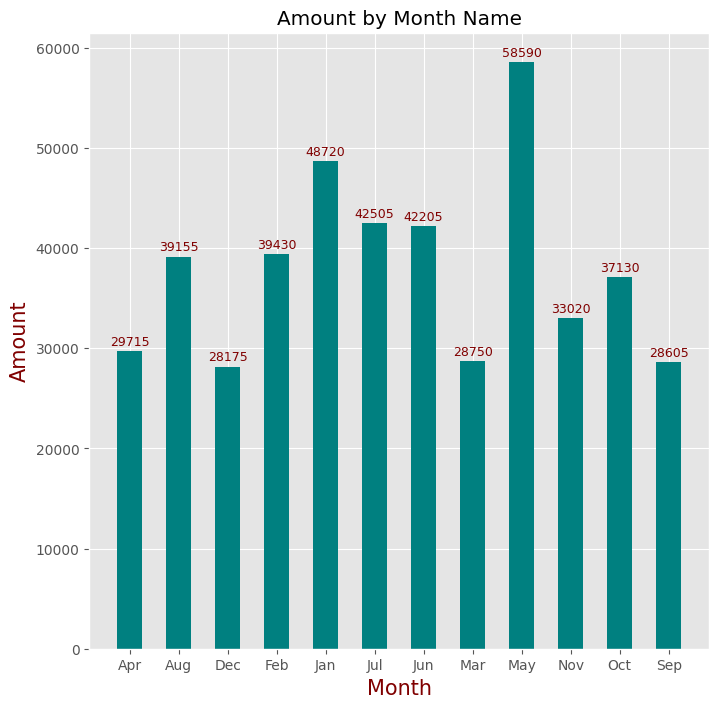

In [161]:
#Amount by month
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
total_amount = df.groupby(df['Date'].dt.strftime('%b'))['Amount'].sum()
barplot=plt.bar(total_amount.index,total_amount,color='#008080',width=0.5)
plt.title('Amount by Month Name')
plt.xlabel('Month',fontsize=15,color='#800000')
plt.ylabel('Amount',fontsize=15,color='#800000')
plt.bar_label(barplot,label_type='edge',color='#800000',padding=2,fontsize=9)
plt.show()

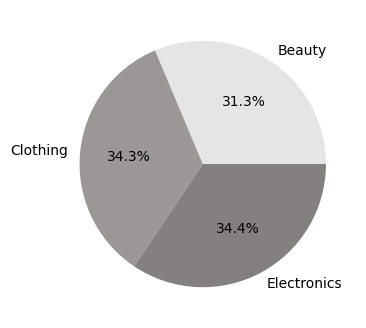

In [162]:
#profit by category
plt.style.use('ggplot')
plt.figure(figsize=(4,4))
amount_product_category = df.groupby('Product Category')['profit'].sum().reset_index()
piechart  =plt.pie(amount_product_category['profit'],labels=amount_product_category['Product Category'],
                   autopct='%1.1f%%',colors=['#e6e5e5','#9b9797','#858080'],labeldistance=1.1)
plt.show()

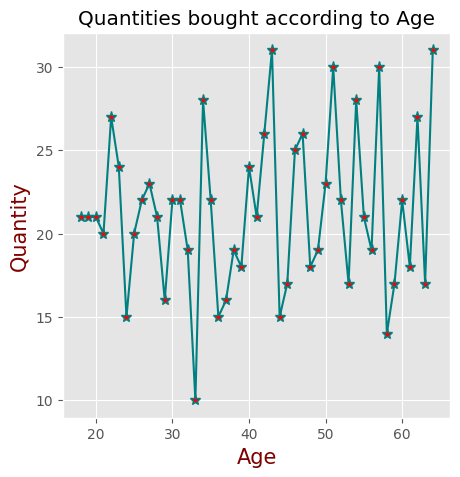

In [163]:
#age vs quantity
plt.figure(figsize=(5,5))
quantity_total=df.groupby('Age')['Quantity'].count().reset_index()
plt.plot(quantity_total['Age'],quantity_total['Quantity'],color='#008080',marker="*",ms=8, mfc = 'r')
plt.title('Quantities bought according to Age')
plt.xlabel('Age',fontsize=15,color='#800000')
plt.ylabel('Quantity',fontsize=15,color='#800000')
plt.show()

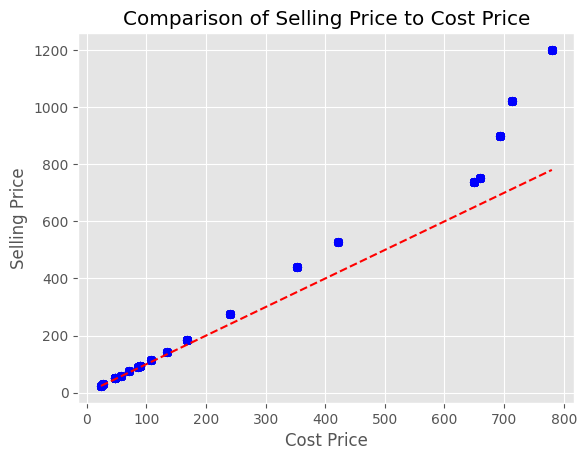

In [164]:
#comparsion of selling price to quantity
plt.scatter(df['cost_price'], df['Amount_after_discount'], color='blue', alpha=0.7)
plt.plot([min(df['cost_price']), max(df['cost_price'])], [min(df['cost_price']), max(df['cost_price'])],
         color='red', linestyle='--')
plt.xlabel('Cost Price')
plt.ylabel('Selling Price')
plt.title('Comparison of Selling Price to Cost Price')
plt.grid(True)

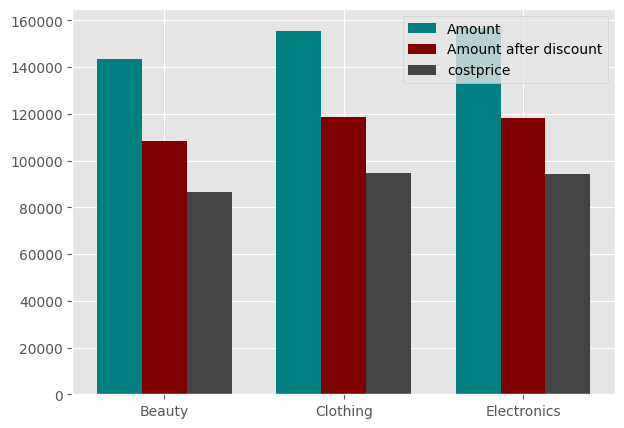

In [165]:
#comparing product category with amount,amount after discount,costprice
plt.figure(figsize=(7,5))
width =0.25
ax = df.groupby('Product Category')['Amount'].sum().reset_index()
ax1 = df.groupby('Product Category')['Amount_after_discount'].sum().reset_index()
ax2 = df.groupby('Product Category')['cost_price'].sum().reset_index()
plt.bar(ax.index - width,ax['Amount'],width=width,label = 'Amount',color='#008080')
plt.bar(ax1.index,ax1['Amount_after_discount'],width=width,label = 'Amount after discount',color='#800000')
plt.bar(ax2.index + width,ax2['cost_price'],width=width,label = 'costprice',color='#444444')
plt.xticks(ticks=ax.index,labels=ax['Product Category'])
plt.legend()
plt.show()

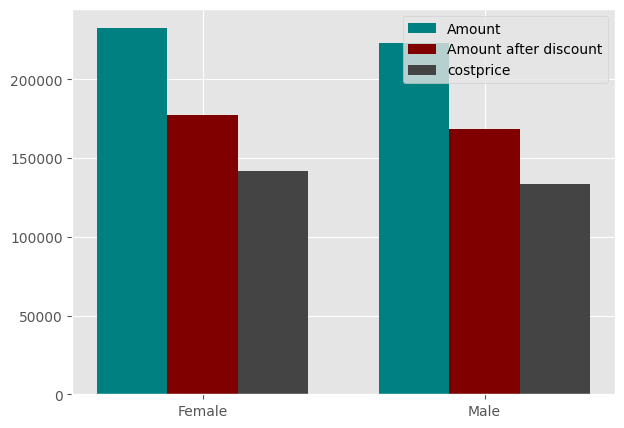

In [166]:
#comparing Gender with amount,amount after discount,costprice
plt.figure(figsize=(7,5))
width =0.25
ax = df.groupby('Gender')['Amount'].sum().reset_index()
ax1 = df.groupby('Gender')['Amount_after_discount'].sum().reset_index()
ax2 = df.groupby('Gender')['cost_price'].sum().reset_index()
plt.bar(ax.index - width,ax['Amount'],width=width,label = 'Amount',color='#008080')
plt.bar(ax1.index,ax1['Amount_after_discount'],width=width,label = 'Amount after discount',color='#800000')
plt.bar(ax2.index + width,ax2['cost_price'],width=width,label = 'costprice',color='#444444')
plt.xticks(ticks=ax.index,labels=ax['Gender'])
plt.legend()
plt.show()

In [167]:
#creating a age group column from existing age column
bins=[1,18,35,50,80]
labels=['children','Adult','Senior Adult','Old Age'] #changed labels to have one less element
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [168]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Amount,discount,profit %,Amount_after_discount,cost_price,profit,Age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.05,0.05,142.0,135.0,7.0,Adult
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.25,0.12,750.0,660.0,90.0,Adult
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.00,0.05,30.0,28.0,2.0,Old Age
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.12,0.20,440.0,352.0,88.0,Senior Adult
4,5,2023-06-05,CUST005,Male,30,Beauty,2,50,100,0.05,0.05,95.0,90.0,5.0,Adult


In [169]:
df['Age_group'].value_counts()

Adult           352
Old Age         336
Senior Adult    312
children          0
Name: Age_group, dtype: int64

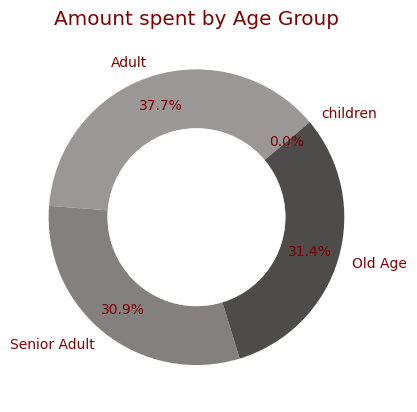

In [170]:
#Donut chart for getting Amount by age group
colors = ['#e6e5e5','#9b9797','#858080','#4e4b4b']

#amount by age group
amount_by_age_group = df.groupby('Age_group')['Amount'].sum().reset_index()

#plotting the pie
plt.pie(amount_by_age_group['Amount'],labels=amount_by_age_group['Age_group'],colors=colors,autopct='%1.1f%%',
        pctdistance=0.80,startangle=40,textprops={'color':'#800000'})

#making a inner circle
center_circle = plt.Circle((0,0),0.6,color='white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Amount spent by Age Group',color='#800000')
plt.show()

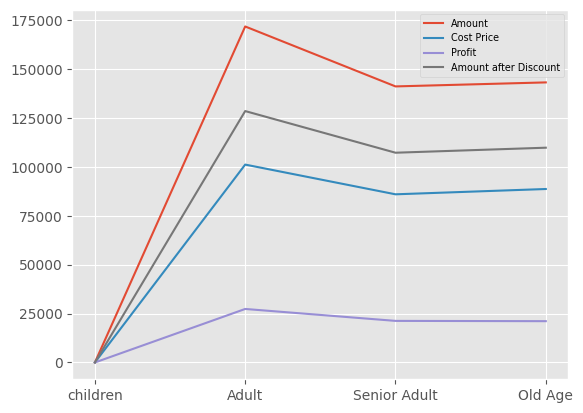

In [171]:
#Amount,amount after discount ,cost price,profit vs age group
amount = df.groupby('Age_group')['Amount'].sum().reset_index()
plt.plot(amount['Age_group'],amount['Amount'],label='Amount')
costprice = df.groupby('Age_group')['cost_price'].sum().reset_index()
plt.plot(costprice['Age_group'],costprice['cost_price'],label='Cost Price')
profit = df.groupby('Age_group')['profit'].sum().reset_index()
plt.plot(profit['Age_group'],profit['profit'],label='Profit')
Amount_after_discount = df.groupby('Age_group')['Amount_after_discount'].sum().reset_index()
plt.plot(Amount_after_discount['Age_group'],Amount_after_discount['Amount_after_discount'],label='Amount after Discount')
plt.legend(loc='upper right',fontsize='x-small')
plt.show()

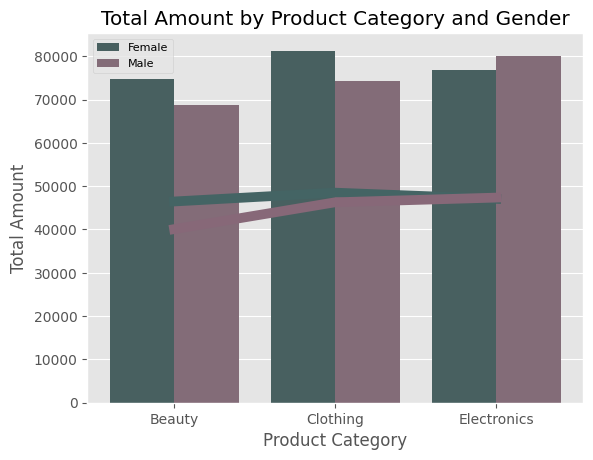

In [172]:
cols = ['#446464', '#876878']
total_amount = df.groupby(['Product Category', 'Gender'])['Amount'].sum().reset_index()
sns.barplot(data=total_amount, x='Product Category', y='Amount', hue='Gender',palette=cols)
cp = df.groupby(['Product Category', 'Gender'])['cost_price'].sum().reset_index()
sns.lineplot(data=cp, x='Product Category', y='cost_price',hue='Gender',linewidth=7,palette=cols,legend=False,
             linestyle='solid')
plt.title('Total Amount by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.legend(loc='upper left',fontsize=8)
plt.show()

#Data preprocessing

In [173]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Amount,discount,profit %,Amount_after_discount,cost_price,profit,Age_group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,0.05,0.05,142.0,135.0,7.0,Adult
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,0.25,0.12,750.0,660.0,90.0,Adult
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,0.00,0.05,30.0,28.0,2.0,Old Age
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,0.12,0.20,440.0,352.0,88.0,Senior Adult
4,5,2023-06-05,CUST005,Male,30,Beauty,2,50,100,0.05,0.05,95.0,90.0,5.0,Adult


Male -- 1

Female --0

In [174]:
#label encoding on Gender column
df['Gender']=df['Gender'].replace({'Male':1,'Female':0})

Beauty ---> 0

clothing ---> 1

electronics --> 2

In [175]:
#label encoding on product category
df['Product Category'] = df['Product Category'].replace({'Beauty':0,'Clothing':1,'Electronics':2})

In [176]:
df['Age_group'].value_counts()

Adult           352
Old Age         336
Senior Adult    312
children          0
Name: Age_group, dtype: int64

children --> 0

Adult ---> 1

Senior Adult --> 2

old age --> 3

In [177]:
#label encoding on age group
df['Age_group'] = df['Age_group'].replace({'children':0,'Adult':1,'Senior Adult':2,'Old Age':3})

In [178]:
df['Date'] = pd.to_numeric(df['Date'])

In [179]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Amount,discount,profit %,Amount_after_discount,cost_price,profit,Age_group
0,1,1700784000000000000,CUST001,1,34,0,3,50,150,0.05,0.05,142.0,135.0,7.0,1
1,2,1677456000000000000,CUST002,0,26,1,2,500,1000,0.25,0.12,750.0,660.0,90.0,1
2,3,1673568000000000000,CUST003,1,50,2,1,30,30,0.00,0.05,30.0,28.0,2.0,3
3,4,1684627200000000000,CUST004,1,37,1,1,500,500,0.12,0.20,440.0,352.0,88.0,2
4,5,1685923200000000000,CUST005,1,30,0,2,50,100,0.05,0.05,95.0,90.0,5.0,1


# splitting the data features and target



In [180]:
#splitting the data
x=df.drop(columns=['Customer ID','Amount','Amount_after_discount','cost_price','profit'],axis=1)
y=df['Amount']

In [181]:
x.head()

,Transaction ID,Date,Gender,Age,Product Category,Quantity,Price per Unit,discount,profit %,Age_group
0,1,1700784000000000000,1,34,0,3,50,0.05,0.05,1
1,2,1677456000000000000,0,26,1,2,500,0.25,0.12,1
2,3,1673568000000000000,1,50,2,1,30,0.00,0.05,3
3,4,1684627200000000000,1,37,1,1,500,0.12,0.20,2
4,5,1685923200000000000,1,30,0,2,50,0.05,0.05,1


In [182]:
#splitting the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [183]:
print(x_train,y_train)

     Transaction ID                 Date  Gender  Age  Product Category  \
175             176  1699315200000000000       0   43                 0   
818             819  1686787200000000000       0   35                 0   
677             678  1703289600000000000       0   60                 2   
952             953  1682467200000000000       1   45                 0   
200             201  1694304000000000000       1   56                 2   
..              ...                  ...     ...  ...               ...   
534             535  1686528000000000000       1   47                 0   
584             585  1672876800000000000       0   24                 1   
493             494  1694995200000000000       0   42                 0   
527             528  1686096000000000000       0   36                 1   
168             169  1700179200000000000       1   18                 0   

     Quantity  Price per Unit  discount  profit % Age_group  
175         2              50      0.

In [184]:
print(x_train.shape)
print(x_test.shape)

(800, 10)
(200, 10)


# Applying ML model

In [185]:
model=LinearRegression()

In [186]:
model.fit(x_train,y_train)

LinearRegression()

In [187]:
#model Evaluation on training data
x_train_prediction=model.predict(x_train)

#calculating r2 score
training_r2_score = metrics.r2_score(y_train,x_train_prediction)

print(training_r2_score)

0.7165489247653081


In [188]:
#model Evaluation on testing data
x_test_prediction=model.predict(x_test)

#calculating r2 score
testing_r2_score = metrics.r2_score(y_test,x_test_prediction)

print(testing_r2_score)

0.769953591684858


In [189]:
#making prediction model
x_new = [953,1682467200000000000,1,45,0,3,30,0.00,0.05,2 ]

#converting it into numpy array
x_new_numpy = np.asarray(x_new)

#reshape data
reshape_data = x_new_numpy.reshape(1,-1)

#prediction
prediction= model.predict(reshape_data)
print(prediction)

[57.21171273]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
